In [1]:
from prepare_data import prepare_data


data = prepare_data(5, 20, 50, 0.014)

data = data.iloc[4500:] # Remove some data
data

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,...,Diff,Short_day_change,Mid_day_change,Long_day_change,t+1,t+2,t+4,t+5,t+3,Target
867,2021-05-10,99.22,99.26,98.84,99.34,98.10,99.34,98.825,2918512.0,2.884048e+08,...,0.92,0.188,0.1200,0.1724,97.56,96.76,98.76,98.90,99.70,0
866,2021-05-11,97.50,97.56,98.84,99.02,97.52,97.56,98.118,5113260.0,5.017266e+08,...,-1.78,0.172,0.0480,0.1708,96.76,99.70,98.90,97.64,98.76,1
865,2021-05-12,96.14,96.18,96.90,97.30,95.94,96.76,96.492,3670967.0,3.542064e+08,...,-0.80,-0.324,0.0330,0.1252,99.70,98.76,97.64,98.26,98.90,1
864,2021-05-14,99.78,99.82,98.10,100.20,97.34,99.70,98.940,6147501.0,6.082310e+08,...,2.94,0.228,0.2110,0.1768,98.76,98.90,98.26,98.62,97.64,0
863,2021-05-17,98.94,98.98,99.64,99.70,97.88,98.76,98.538,4034215.0,3.974850e+08,...,-0.94,0.068,0.0860,0.1340,98.90,97.64,98.62,98.20,98.26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2024-09-30,104.15,104.20,104.75,105.65,104.00,104.25,104.472,4093714.0,4.276752e+08,...,-0.50,-0.320,-0.1100,-0.0660,103.30,103.85,102.00,102.45,101.20,0
8,2024-10-01,103.30,103.40,104.15,105.10,102.85,103.30,103.829,4874748.0,5.061708e+08,...,-0.95,-0.630,-0.0925,-0.0740,103.85,101.20,102.45,102.05,102.00,0
7,2024-10-02,103.80,103.85,103.25,103.90,102.50,103.85,103.600,3795117.0,3.931211e+08,...,0.55,-0.510,-0.0725,-0.0490,101.20,102.00,102.05,101.95,102.45,0
6,2024-10-03,101.15,101.20,103.65,103.65,100.90,101.20,101.707,5988553.0,6.090106e+08,...,-2.65,-1.070,-0.2475,-0.1100,102.00,102.45,101.95,101.70,102.05,0


## EDA

Ones:  440
Zeroes:  423


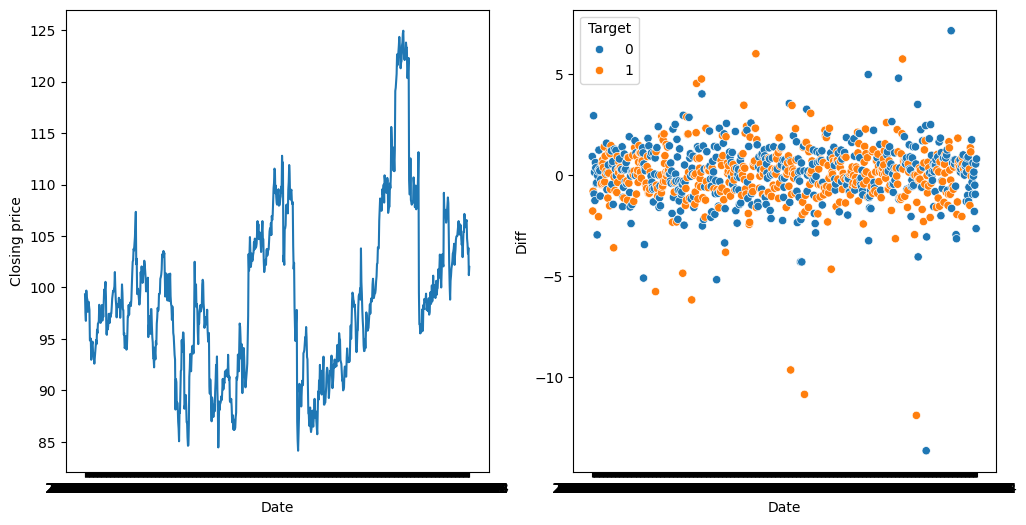

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  

sns.lineplot(data=data, x="Date", y="Closing price", ax=ax1)
sns.scatterplot(data=data, x="Date", y="Diff", hue="Target", ax=ax2)

ones = data[data["Target"] == 1]
zeroes = data[data["Target"] == 0]


print("Ones: ", ones.shape[0]) 
print("Zeroes: ", zeroes.shape[0]) 

plt.show()

## Split data into training and test
Using time-series so no random split

In [3]:
from sklearn.preprocessing import StandardScaler

X = data[["Diff", "Short_day_change", "Mid_day_change", "Long_day_change"]].values
y = data["Target"].values
TRAIN_RATIO = 0.8
split_ix = int(len(data) * TRAIN_RATIO)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X=X)


# Split data into training and validation sets
X_train, X_test = X[:split_ix], X[split_ix:]
X_train_scaled, X_test_scaled = X_scaled[:split_ix], X_scaled[split_ix:]
y_train, y_test = y[:split_ix], y[split_ix:]

## Classifiers

### SVM

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = svm.SVC(kernel="linear")

model.fit(X_train_scaled, y_train)

preds = model.predict(X_test_scaled)

acc = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

# Print the results
print(f"Accuracy: {acc:.4f}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.4740
Precision: 0.4375
Recall: 0.6364
F1 Score: 0.5185


In [5]:
model_sig = svm.SVC(kernel='sigmoid')

model_sig.fit(X_train_scaled, y_train)

preds_sig = model_sig.predict(X_test_scaled)

acc = accuracy_score(y_test, preds_sig)
precision = precision_score(y_test, preds_sig)
recall = recall_score(y_test, preds_sig)
f1 = f1_score(y_test, preds_sig)

# Print the results
print(f"Accuracy: {acc:.4f}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.4913
Precision: 0.4368
Recall: 0.4935
F1 Score: 0.4634


### Random Forest


In [6]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Create and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


# Print evaluation metrics
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.41      0.47        96
           1       0.44      0.58      0.50        77

    accuracy                           0.49       173
   macro avg       0.50      0.50      0.48       173
weighted avg       0.50      0.49      0.48       173

